In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 16

## Unscaled data

Load the hill valley dataset from https://archive.ics.uci.edu/ml/datasets/Hill-Valley

In [3]:
df_train = pd.read_csv('data/Hill_Valley_with_noise_Training.data')
df_test = pd.read_csv('data/Hill_Valley_with_noise_Testing.data')
X_train = df_train.loc[:, [x for x in df_train.columns if x.startswith('X')]]
Y_train = df_train['class']
X_test = df_test.loc[:, [x for x in df_test.columns if x.startswith('X')]]
Y_test = df_test['class']

print(f'Train set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')

Train set size: (606, 100)
Test set size: (606, 100)


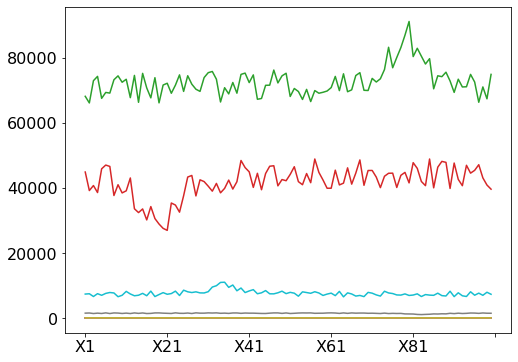

In [4]:
X_train.iloc[range(10), :].T.plot(legend=False)

## Scaled data

In [5]:
def scale_rows(X):
    """Move median to zero and scale the peak to 1 or -1"""

    z = X.sub(X.median(axis=1), axis=0)
    scale = abs(z).max(axis=1)
    return z.div(scale, axis=0)

In [6]:
X_train = scale_rows(X_train)
X_test = scale_rows(X_test)

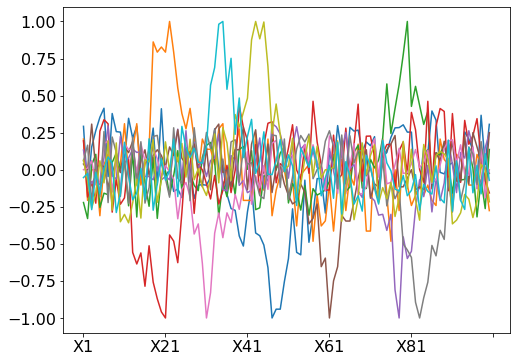

In [7]:
X_train.iloc[range(10), :].T.plot(legend=False)

## LSTM model

In [8]:
model = tf.keras.Sequential()
model.add(layers.LSTM(10, input_shape=(100, 1)))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 10)                480       
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 502
Trainable params: 502
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(np.expand_dims(X_train, 2),
                    Y_train,
                    validation_data=(np.expand_dims(X_test, 2), Y_test),
                    batch_size=8,
                    epochs=10)

Train on 606 samples, validate on 606 samples
Epoch 1/10
606/606 [==============================] - 3s 4ms/sample - loss: 0.6872 - accuracy: 0.6353 - val_loss: 0.6752 - val_accuracy: 0.8102
Epoch 2/10
606/606 [==============================] - 1s 2ms/sample - loss: 0.6596 - accuracy: 0.7822 - val_loss: 0.6402 - val_accuracy: 0.8234
Epoch 3/10
606/606 [==============================] - 1s 2ms/sample - loss: 0.5981 - accuracy: 0.8102 - val_loss: 0.5634 - val_accuracy: 0.7574
Epoch 4/10
606/606 [==============================] - 1s 2ms/sample - loss: 0.4101 - accuracy: 0.8647 - val_loss: 0.1203 - val_accuracy: 0.9868
Epoch 5/10
606/606 [==============================] - 1s 2ms/sample - loss: 0.0809 - accuracy: 0.9901 - val_loss: 0.0767 - val_accuracy: 0.9818
Epoch 6/10
606/606 [==============================] - 1s 2ms/sample - loss: 0.1347 - accuracy: 0.9736 - val_loss: 0.0400 - val_accuracy: 0.9950
Epoch 7/10
606/606 [==============================] - 1s 2ms/sample - loss: 0.0463 - accur

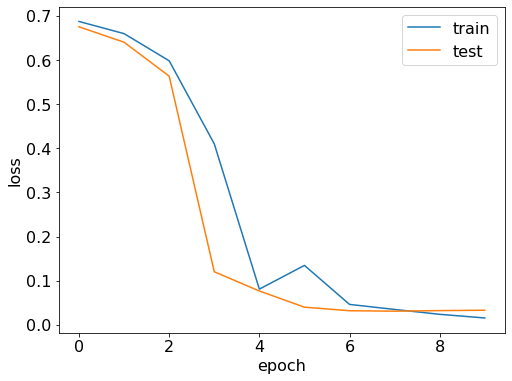

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()